**Competition Description**

Segment Customers into 4 groups

In [ ]:
pip install pycaret

## EDA
### Data Exploration
###### Examining the dataset to understand its structure, size, and the types of variables it contains.

In [10]:
import pandas as pd

In [11]:
train = pd.read_csv('Train.csv')

In [13]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [14]:
test = pd.read_csv('Test.csv')

The clustering module in PyCaret contains a variety of functions for unsupervised learning, including functions for creating and comparing different types of clustering models.

### Data modeling
###### Creating models to make predictions or classify the data.

In [15]:
from pycaret.clustering import *

In [ ]:
setup(test)

In [17]:
kmeans=create_model('kmeans',num_clusters=4) # result

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5728,13266.706,0.5007,0,0,0


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=5397, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


**Data interpretation**
Interpreting the results of the analysis and drawing conclusions about the dataset.


In [18]:
# this is usefull to decide the optimung number of clusters, in this case 4 
plot_model(kmeans)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [19]:
plot_model(kmeans,plot='tsne')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


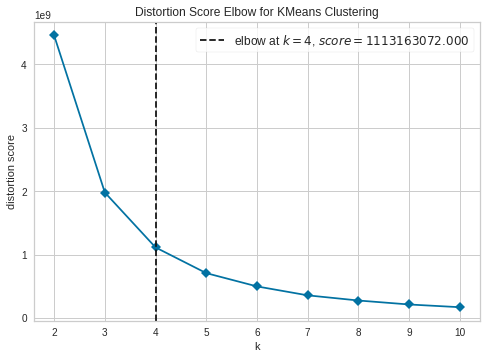

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [20]:
plot_model(kmeans,plot='elbow')

In [ ]:
# we save the model and used it after that for the test Dataframe to Cluster the Customers
save_model(kmeans, 'create_model')
results = assign_model(kmeans)
results.head(10)

In [22]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [23]:
results['Cluster'].value_counts()

Cluster 1    702
Cluster 0    665
Cluster 3    632
Cluster 2    628
Name: Cluster, dtype: int64

In [24]:
train['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
results["Cluster"]=results["Cluster"].replace(["Cluster 0"],"A")
results["Cluster"]=results["Cluster"].replace(["Cluster 1"],"B")
results["Cluster"]=results["Cluster"].replace(["Cluster 2"],"C")
results["Cluster"]=results["Cluster"].replace(["Cluster 3"],"D")

In [28]:
results.sample(50)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
1620,464526,Male,Yes,51,Yes,Entertainment,0.0,Average,4.0,Cat_6,D
1549,464212,Female,Yes,58,Yes,Marketing,0.0,Average,2.0,Cat_6,D
2347,467053,Male,No,18,No,Healthcare,5.0,Low,4.0,Cat_6,C
1075,462578,Male,Yes,35,Yes,Artist,9.0,Average,2.0,Cat_4,A
1233,463129,Male,Yes,65,No,Doctor,NaN,Low,1.0,Cat_6,A
141,459418,Male,Yes,69,No,Executive,0.0,High,2.0,Cat_6,B
613,461000,Male,Yes,60,No,Marketing,1.0,High,2.0,Cat_3,B
665,461183,Male,No,36,No,Executive,0.0,Low,5.0,Cat_3,B
1261,463199,Female,Yes,47,Yes,Artist,0.0,Low,3.0,Cat_4,A
1205,463039,Male,Yes,38,No,Executive,12.0,High,7.0,Cat_6,A


In [29]:
results['Cluster'].value_counts()

B    702
A    665
D    632
C    628
Name: Cluster, dtype: int64